<img src="../images/CONFIDENTDATASCIENCE.png" alt="An image that reads Confident Data Science: The Essential Skills of Data Science, Companion Jupyter Notebook + Coding Examples. Also shows book image."/>

## Chapter 5 *Data Exploration*

To give citation to these coding examples give reference to an appropriate chapter and page of:

*Confident Data Science: Discover the essential skills of data science* <br>
(Confident Series, 15) 1st Edition by Adam Ross Nelson (Author) <br>
Publisher : Kogan Page (September 26, 2023).


## Loading + Exploring Data With Python

In [1]:
# Standard Pandas + Seaborn import
import pandas as pd
import seaborn as sns

# Load data using Pandas from online (Option A)
df = pd.read_csv('https://raw.githubusercontent.com/' + \
                 'mwaskom/seaborn-data/master/mpg.csv')

# Load data using Seaborn (Option B)
df = sns.load_dataset('mpg')

<Axes: title={'center': 'Histogram of Vehicle Efficiency'}, ylabel='Frequency'>

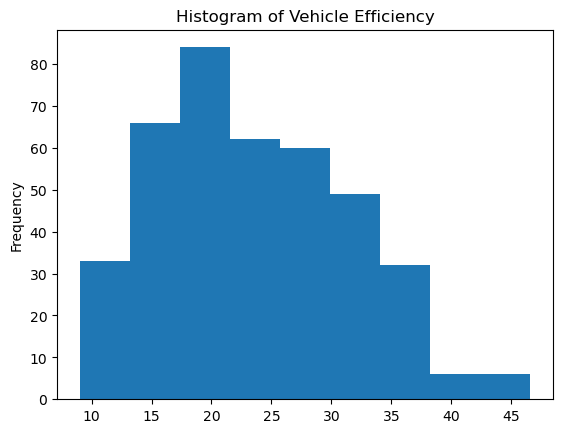

In [2]:
# Generate a histogram with Pandas .plot.hist 
df['mpg'].plot.hist(
    title='Histogram of Vehicle Efficiency',
    bins=9)


<Axes: title={'center': 'Efficiency & Weight: Scatter Plot'}, xlabel='weight', ylabel='mpg'>

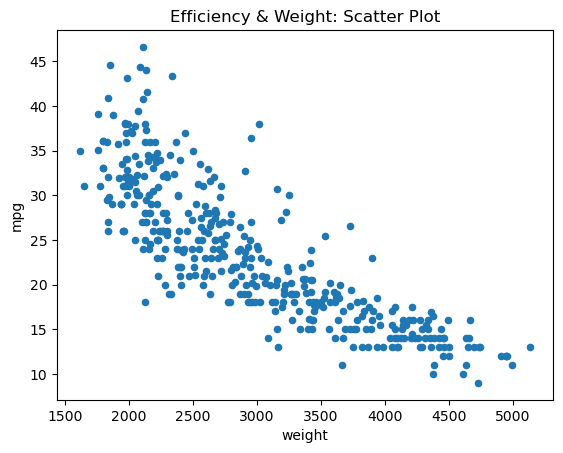

In [3]:
# Generate a scatter plot with Pandas .plot.scatter()
df.plot.scatter(
    y='mpg', x='weight',
    title='Efficiency & Weight: Scatter Plot')


### Inspective For Missing Values

In [4]:
# Create df, zeros=non-missing, ones=missing
to_browse = (df.isnull() * 1)

# Create a 'base' record that will be all missing
to_browse.loc['base'] = 1

# Style and save the result as html
to_browse.style.highlight_max(
    color='red').to_html('to_browse.html')


In [5]:
# Display range of obs before + after missing
df.loc[30:35]


mpg  cylinders  displacement  horsepower  weight  acceleration  \
30  28.0          4         140.0        90.0    2264          15.5   
31  25.0          4         113.0        95.0    2228          14.0   
32  25.0          4          98.0         NaN    2046          19.0   
33  19.0          6         232.0       100.0    2634          13.0   
34  16.0          6         225.0       105.0    3439          15.5   
35  17.0          6         250.0       100.0    3329          15.5   

    model_year origin                       name  
30          71    usa        chevrolet vega 2300  
31          71  japan              toyota corona  
32          71    usa                 ford pinto  
33          71    usa                amc gremlin  
34          71    usa  plymouth satellite custom  
35          71    usa  chevrolet chevelle malibu

In [6]:
# Further explore with the isnull().sum()
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
# Further explor missing values with the isnull().mean() + apply() methods
df.isnull().mean().apply(
    lambda x: '{:.3f} % Missing'.format(x * 100))


mpg             0.000 % Missing
cylinders       0.000 % Missing
displacement    0.000 % Missing
horsepower      1.508 % Missing
weight          0.000 % Missing
acceleration    0.000 % Missing
model_year      0.000 % Missing
origin          0.000 % Missing
name            0.000 % Missing
dtype: object

```Python
# As published in the book this example was
df.isnull().mean().apply(
    lambda x: '{:f} % Missing'.format(x * 100))

# Another option would be (f-string)
df.isnull().mean().apply(
    lambda x: f'{x * 100:.3f} % Missing')
```

### Inspecting For Missing Values (Graphically)

<Axes: >

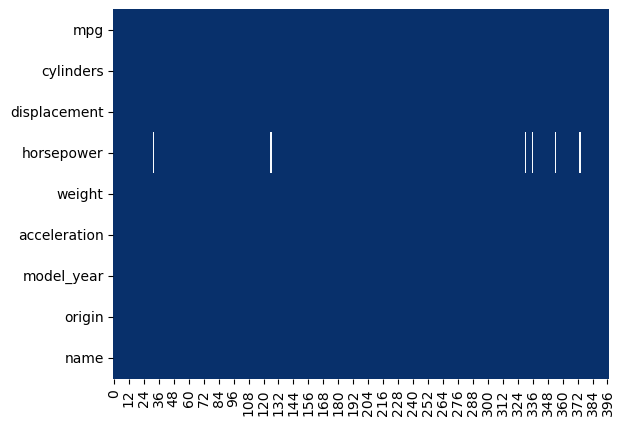

In [8]:
# Further explore missing values with Seaborn heatmap
sns.heatmap(df.isnull().transpose(), 
            cmap='Blues_r',
            cbar=False)


### The Correlation Matrix & Pairplot

Updates following publication requires `numeric_only=True` to avoid a future warning.

In [9]:
# Generate a correlation matrix table
df.corr(numeric_only=True)

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   

              acceleration  model_year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.689196   -0.416361  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model_year        0.288137    1.000000

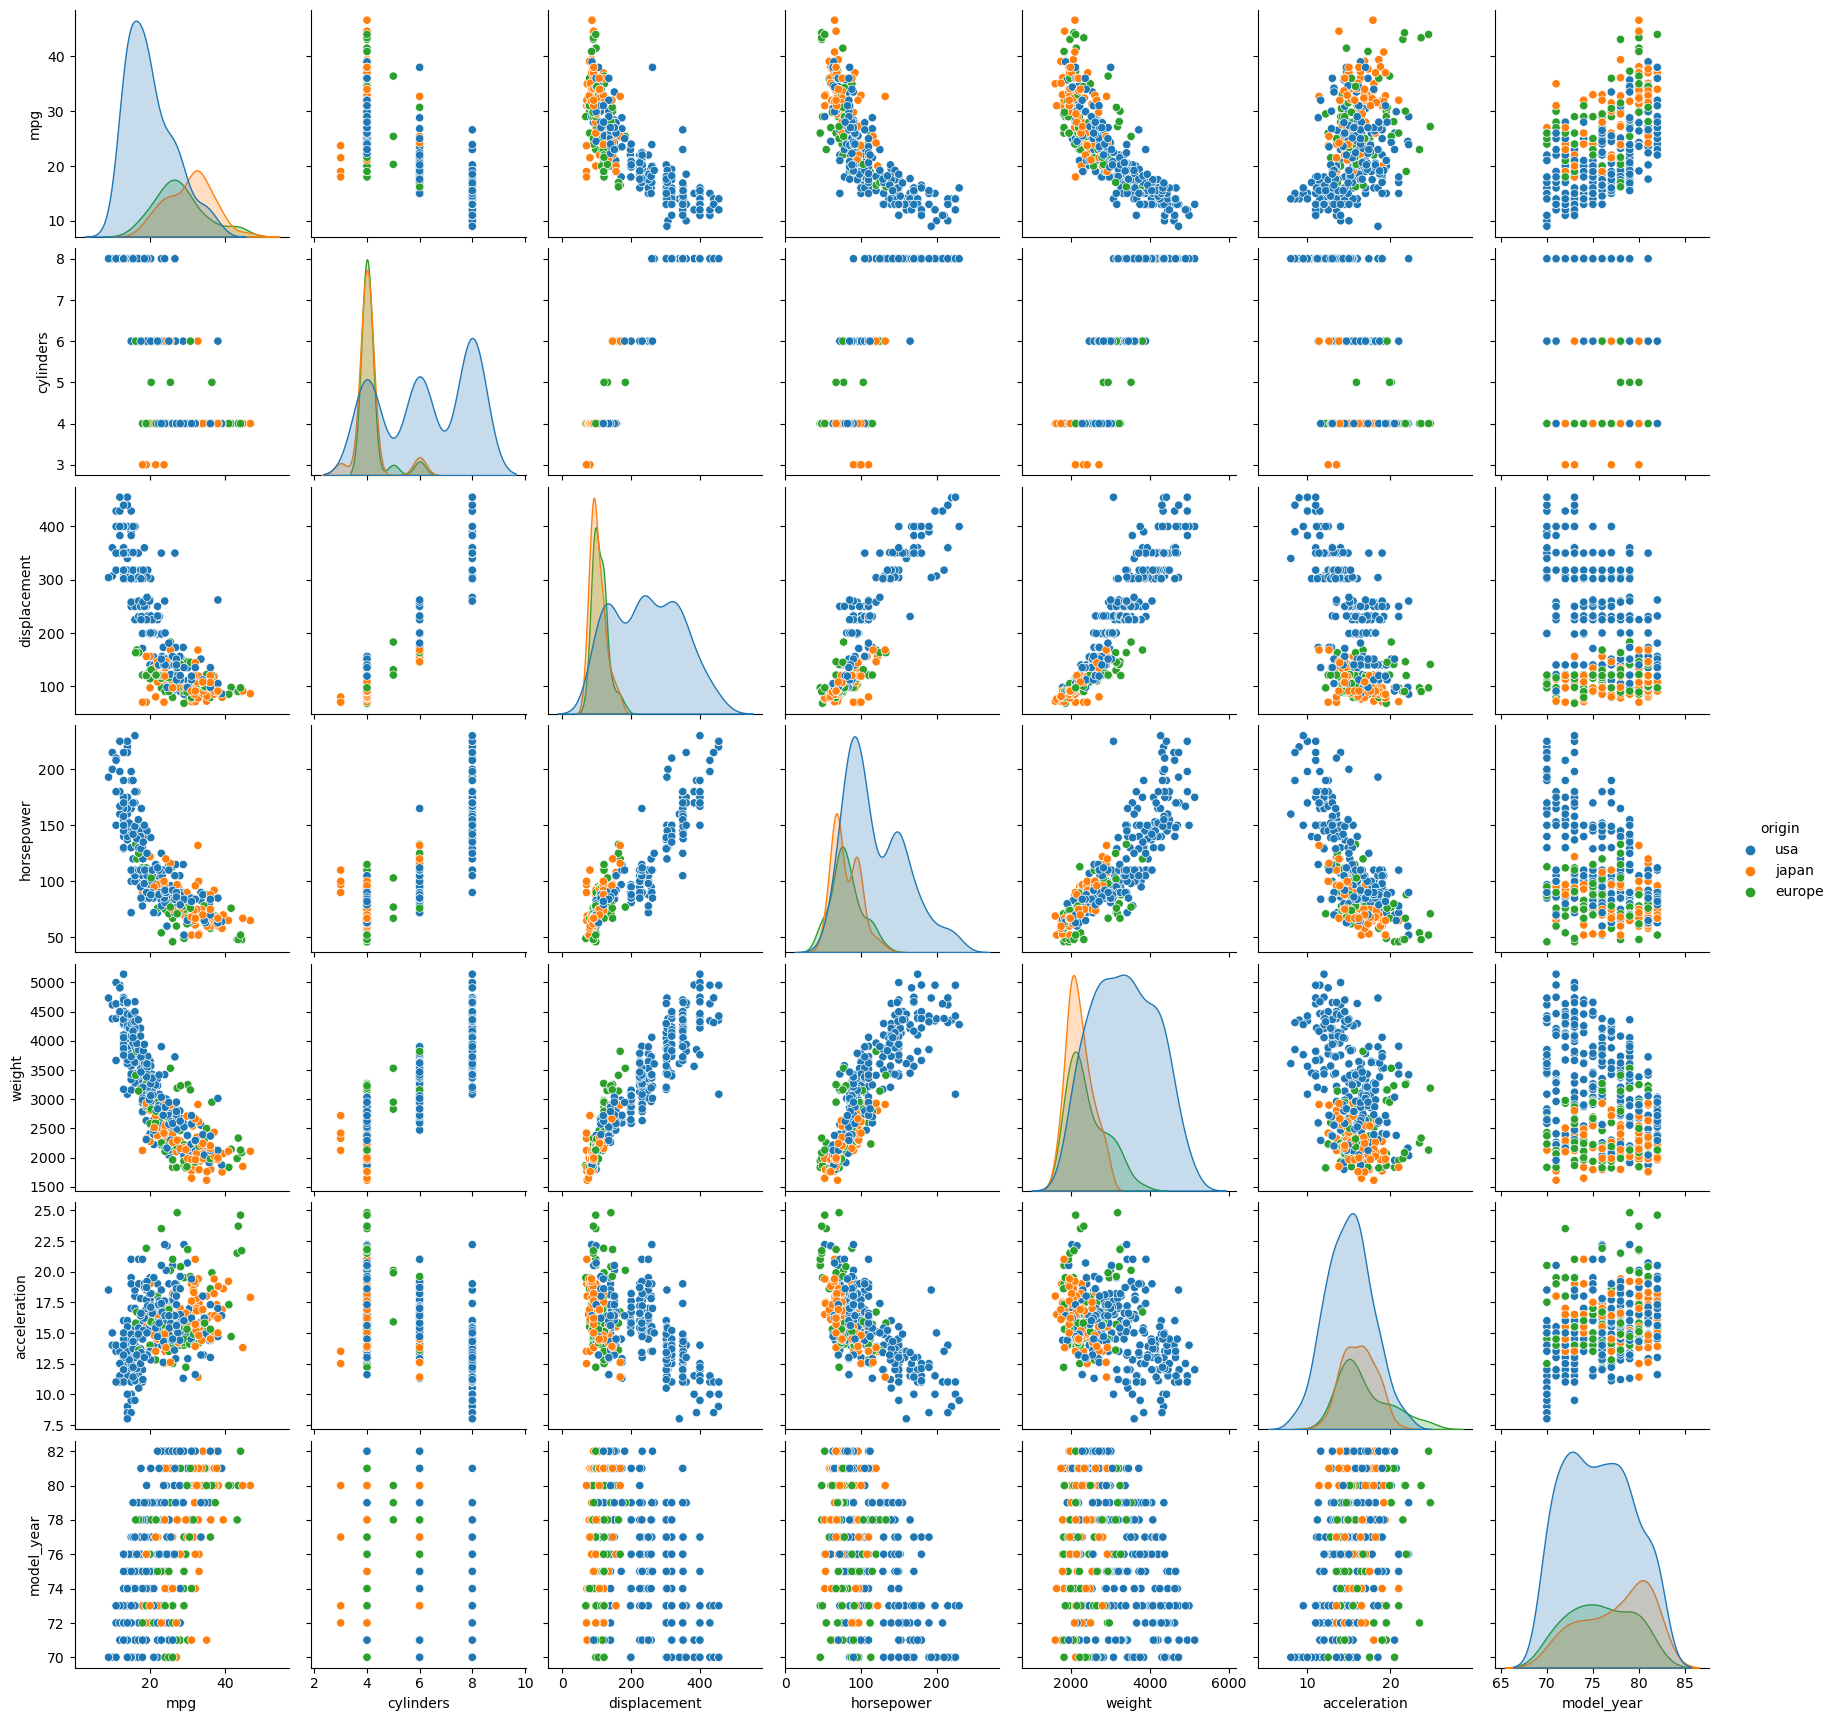

In [10]:
# Generate a pairplot that visually explores correlations
sns.pairplot(df, hue='origin')

```Python
# As published in the book this example was
sns.pairplot(
    df[['mpg','cylinders','weight','horsepower']], 
    hue='origin')
```

## Y-Data Profiling

To first install Y-Data Profiling package library
```bash
$ pip install -U ydata-profiling
```

In [11]:
# Import standard libraries
import pandas as pd
import numpy as np

# Import additional necessary library
from ydata_profiling import ProfileReport

# Load data from remote URL into pandas DataFrame object
df = sns.load_dataset('mpg')

# Generate a data profiling report using ydata_profiling library
pr = ProfileReport(
    df, title="MPG Seaborn Confident Data Science Profiling Report")

pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Save the profile report as an html file
pr.to_file('Automated_Automobile_Data_Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Update + Change Log

March, 2023 - Created notebook.<br>
April, 2023 - Prepared for GitHub.<br>
October, 2023 - Revised to match code published in the book.